<a href="https://colab.research.google.com/github/SauryanPandey/FashionMNIST/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_data = datasets.FashionMNIST(root = "", train = True, download = True, transform = ToTensor())
test_data = datasets.FashionMNIST(root = "", train = False, download = True, transform = ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 11084681.41it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 192996.77it/s]


Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3713888.87it/s]


Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17742216.10it/s]


Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw



In [3]:
batch_size = 64
train_set = DataLoader(training_data, batch_size = batch_size, shuffle = True)
test_set = DataLoader(test_data, batch_size, True)

In [4]:
for data in train_set:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0118,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

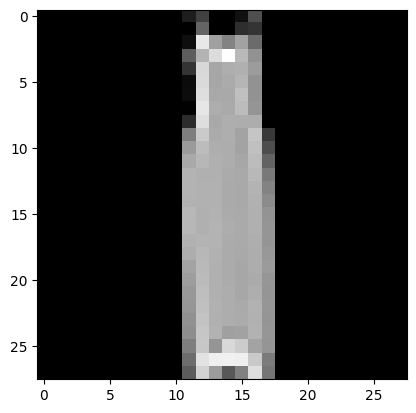

Label: 3


In [5]:
# Display image and label.
train_features, train_labels = next(iter(train_set))
print(train_features, train_labels)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze()
label = train_labels[1]
print(img.size(), label)
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [6]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [16]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        #X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [17]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [18]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_set, model, loss_fn, optimizer)
    test(test_set, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313561  [   64/60000]
loss: 0.520245  [ 6464/60000]
loss: 0.544463  [12864/60000]
loss: 0.312070  [19264/60000]
loss: 0.525925  [25664/60000]
loss: 0.306240  [32064/60000]
loss: 0.455963  [38464/60000]
loss: 0.515724  [44864/60000]
loss: 0.398014  [51264/60000]
loss: 0.513876  [57664/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.427077 

Epoch 2
-------------------------------
loss: 0.307982  [   64/60000]
loss: 0.337359  [ 6464/60000]
loss: 0.484339  [12864/60000]
loss: 0.225087  [19264/60000]
loss: 0.463925  [25664/60000]
loss: 0.441175  [32064/60000]
loss: 0.414718  [38464/60000]
loss: 0.475750  [44864/60000]
loss: 0.376905  [51264/60000]
loss: 0.376131  [57664/60000]
Test Error: 
 Accuracy: 87.0%, Avg loss: 0.359766 

Epoch 3
-------------------------------
loss: 0.331707  [   64/60000]
loss: 0.349405  [ 6464/60000]
loss: 0.413158  [12864/60000]
loss: 0.269107  [19264/60000]
loss: 0.295354  [25664/60000]
loss: 0.183849  [32064/600

In [51]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
incorrect = 0;
with torch.no_grad():
  for x,y in enumerate(test_data):
      pred = model(y[0]).squeeze()
      predicted, actual = classes[pred.argmax(0)], classes[y[1]]
      if(predicted != actual):
        incorrect += 1;
        print(f'Predicted: "{predicted}", Actual: "{actual}"')
  print(f"Wrong Predictions : {incorrect}")

Predicted: "Pullover", Actual: "Coat"
Predicted: "Sandal", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Coat"
Predicted: "T-shirt/top", Actual: "Shirt"
Predicted: "Shirt", Actual: "Dress"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Shirt", Actual: "Coat"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Coat", Actual: "Dress"
Predicted: "Sneaker", Actual: "Ankle boot"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Sneaker", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Shirt", Actual: "T-shirt/top"
Predicted: "Dress", Actual: "Shirt"
Predicted: "Dress", Actual: "Coat"
Predicted: "Shirt", Actual: "Coat"
Predicted: "Dress", Actual: "Coat"
Predicted: "Shirt", Actual: "T-shirt/top"
Predicted: "Shirt", Actual: "Pullover"
Predicted: "Dress", Actual: "Trouser"
Predicted: "Shirt", Actual: "Coat"
Predicted: "Shirt", Actual: "Pullover"
P